In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales/sales_5000000.csv


In [24]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For advanced visualizations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling data


## --- Data Loading ---


In [63]:
import pandas as pd


file_path = '/kaggle/input/sample-sales/sales_5000000.csv'
data = pd.read_csv(file_path)


df = data.tail(100000)


In [14]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
4900000,Middle East and North Africa,Algeria,Clothes,Online,L,2019-09-06,446019446,2019-09-21,5921,109.28,35.84,647046.88,212208.64,434838.24
4900001,Europe,Bosnia and Herzegovina,Cosmetics,Online,H,2019-09-12,619706857,2019-10-13,3885,437.20,263.33,1698522.00,1023037.05,675484.95
4900002,Asia,Maldives,Meat,Offline,M,2014-08-14,519134318,2014-08-17,2236,421.89,364.69,943346.04,815446.84,127899.20
4900003,Central America and the Caribbean,The Bahamas,Office Supplies,Online,H,2020-03-20,211538159,2020-05-05,7697,651.21,524.96,5012363.37,4040617.12,971746.25
4900004,Middle East and North Africa,Somalia,Snacks,Online,H,2016-05-05,734467208,2016-05-14,4023,152.58,97.44,613829.34,392001.12,221828.22


## -- Data Exploration --

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 4900000 to 4999999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [16]:
unique_regions = df['Region'].unique(), df['Region'].value_counts()
print(unique_regions)

(array(['Middle East and North Africa', 'Europe', 'Asia',
       'Central America and the Caribbean', 'Sub-Saharan Africa',
       'North America', 'Australia and Oceania'], dtype=object), Region
Sub-Saharan Africa                   26145
Europe                               25740
Asia                                 14465
Middle East and North Africa         12546
Central America and the Caribbean    10697
Australia and Oceania                 8187
North America                         2220
Name: count, dtype: int64)


In [17]:
unique_regions = df['Country'].unique(), df['Country'].value_counts()
print(unique_regions)

(array(['Algeria', 'Bosnia and Herzegovina', 'Maldives', 'The Bahamas',
       'Somalia', 'Serbia', 'Laos', 'Panama', 'Saudi Arabia', 'Malawi',
       'Benin', 'Kazakhstan', 'Mexico', 'Angola', 'Austria', 'Libya',
       'Cuba', 'Russia', 'Estonia', 'Ukraine', 'Eritrea',
       'Saint Kitts and Nevis ', 'Oman', 'Kosovo', 'Netherlands',
       'Belize', 'Pakistan', 'Mongolia', 'Singapore', 'Monaco',
       'Malaysia', 'Denmark', 'Zimbabwe', 'Macedonia', 'Mauritania',
       'Tonga', 'Jordan', 'Dominica', 'Democratic Republic of the Congo',
       'China', 'Czech Republic', 'France', 'Senegal', 'Djibouti',
       'Philippines', 'Sudan', 'United Arab Emirates', 'Poland',
       'United Kingdom', 'Solomon Islands', 'Kyrgyzstan', 'Egypt',
       'Nicaragua', 'Lithuania', 'Seychelles ', 'Iran', 'Morocco',
       'Turkey', 'Thailand', 'Japan', 'Trinidad and Tobago', 'Tunisia ',
       'Bhutan', 'Luxembourg', 'Montenegro', 'Ghana',
       'Federated States of Micronesia', 'Antigua and Barbuda 

In [18]:
unique_regions = df['Item Type'].unique(), df['Item Type'].value_counts()
print(unique_regions)

(array(['Clothes', 'Cosmetics', 'Meat', 'Office Supplies', 'Snacks',
       'Personal Care', 'Fruits', 'Vegetables', 'Cereal', 'Baby Food',
       'Household', 'Beverages'], dtype=object), Item Type
Baby Food          8382
Fruits             8381
Beverages          8368
Vegetables         8365
Office Supplies    8349
Snacks             8348
Household          8338
Cereal             8337
Clothes            8334
Meat               8292
Personal Care      8257
Cosmetics          8249
Name: count, dtype: int64)


In [19]:
unique_regions = df['Order Priority'].unique(), df['Order Priority'].value_counts()
print(unique_regions)

(array(['L', 'H', 'M', 'C'], dtype=object), Order Priority
H    25245
M    25038
L    24904
C    24813
Name: count, dtype: int64)


## -- Data Cleaning -- 


### * Missing Data

In [20]:
df.isnull().sum() 

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### - Duplicates

In [22]:
df.duplicated().sum() 

0

### - Handle Outliers 

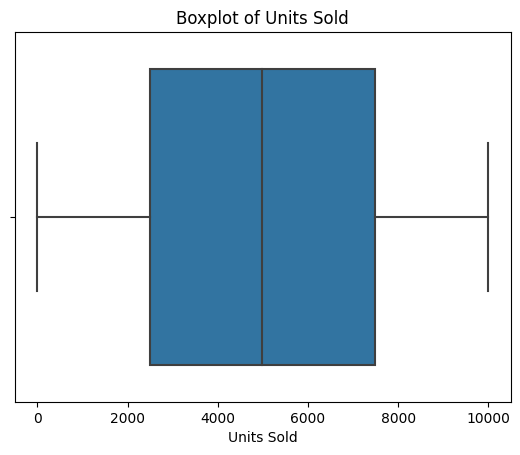

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Proper syntax to plot the boxplot for 'Units Sold'
sns.boxplot(x=df['Units Sold'])
plt.title('Boxplot of Units Sold')
plt.show()

#### ***  the distribution looks quite symmetrical without extreme outliers. ***

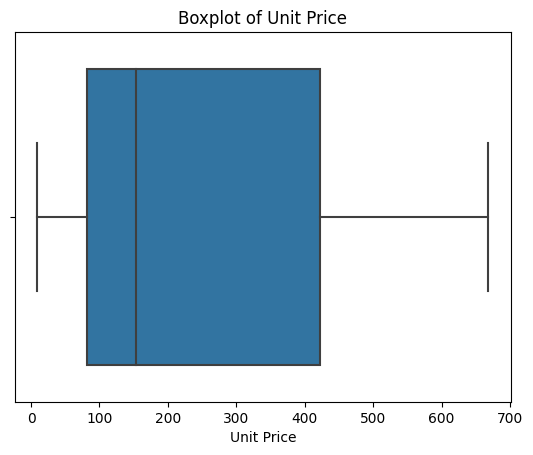

In [29]:

sns.boxplot(x=df['Unit Price'])
plt.title('Boxplot of Unit Price')
plt.show()

#### **** this boxplot for 'Unit Price' looks good as well! ****

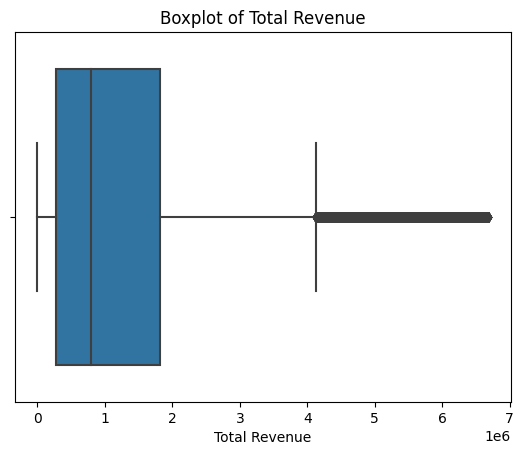

In [30]:
sns.boxplot(x=df['Total Revenue'])
plt.title('Boxplot of Total Revenue')
plt.show()

#### **** The boxplot of Total Revenue showed significant outliers on the higher end, which could skew our analysis. To address this, we applied a log transformation to compress the range of values and reduce skewness. This made the data more uniform, improving its suitability for modeling. ****

In [32]:
df.loc[:, 'Total Revenue'] = df['Total Revenue'].apply(lambda x: np.log1p(x))


In [33]:
print(df[['Total Revenue']].head())


         Total Revenue
4900000       2.665851
4900001       2.730807
4900002       2.691730
4900003       2.798952
4900004       2.662179


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


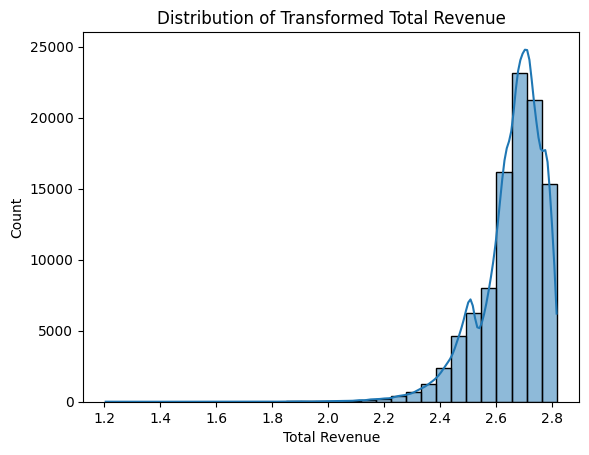

In [34]:
sns.histplot(df['Total Revenue'], bins=30, kde=True)
plt.title('Distribution of Transformed Total Revenue')
plt.show()

#### **** the distribution looks much better now! ****

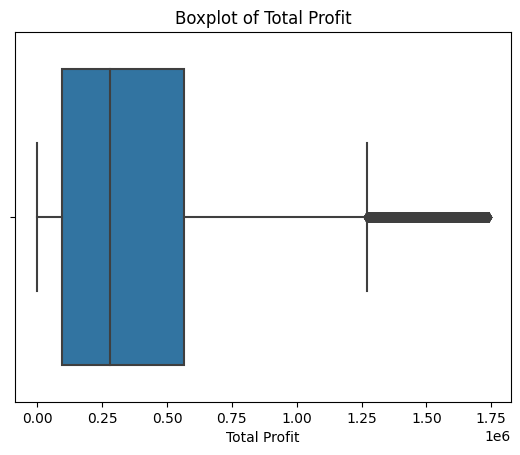

'Total Profit'

In [36]:
sns.boxplot(x=df['Total Profit'])
plt.title('Boxplot of Total Profit')
plt.show()
'Total Profit'

#### 
- These outliers could negatively impact the model's training by skewing the data. Applying a log transformation will:

1- Reduce the influence of extreme values.

2- Normalize the distribution, making it easier for models to learn effectively.

In [37]:
df.loc[:, 'Total Profit'] = df['Total Profit'].apply(lambda x: np.log1p(x))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


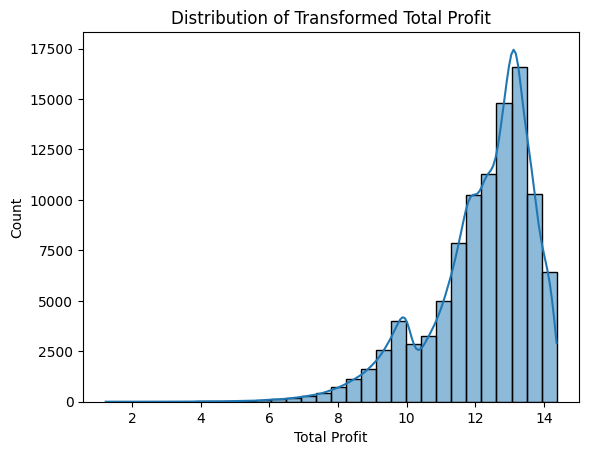

In [39]:
sns.histplot(df['Total Profit'], bins=30, kde=True)
plt.title('Distribution of Transformed Total Profit')
plt.show()

In [40]:
print(df[['Total Profit']].head())

         Total Profit
4900000     12.982732
4900001     13.423188
4900002     11.759006
4900003     13.786851
4900004     12.309663


### - Feature engineering process is to enrich the dataset

 * ####  This calculates the number of days between order and shipment.

In [42]:
df.loc[:, 'Order Processing Time'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days


In [44]:
df.loc[:, 'Order Year'] = pd.to_datetime(df['Order Date']).dt.year
df.loc[:, 'Order Month'] = pd.to_datetime(df['Order Date']).dt.month
df.loc[:, 'Order Day'] = pd.to_datetime(df['Order Date']).dt.day


In [45]:
# Display the first few rows to verify the new columns
print(df[['Order Date', 'Order Year', 'Order Month', 'Order Day']].head())


         Order Date  Order Year  Order Month  Order Day
4900000  2019-09-06        2019            9          6
4900001  2019-09-12        2019            9         12
4900002  2014-08-14        2014            8         14
4900003  2020-03-20        2020            3         20
4900004  2016-05-05        2016            5          5


In [47]:
# Ensure you are working with a full DataFrame
df = df.copy()

# Extract year, month, and day for 'Ship Date'
df['Ship Year'] = pd.to_datetime(df['Ship Date']).dt.year
df['Ship Month'] = pd.to_datetime(df['Ship Date']).dt.month
df['Ship Day'] = pd.to_datetime(df['Ship Date']).dt.day


In [48]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Revenue,Total Cost,Total Profit,Order Processing Time,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
4900000,Middle East and North Africa,Algeria,Clothes,Online,L,2019-09-06,446019446,2019-09-21,5921,109.28,...,2.665851,212208.64,12.982732,15,2019,9,6,2019,9,21
4900001,Europe,Bosnia and Herzegovina,Cosmetics,Online,H,2019-09-12,619706857,2019-10-13,3885,437.20,...,2.730807,1023037.05,13.423188,31,2019,9,12,2019,10,13
4900002,Asia,Maldives,Meat,Offline,M,2014-08-14,519134318,2014-08-17,2236,421.89,...,2.691730,815446.84,11.759006,3,2014,8,14,2014,8,17
4900003,Central America and the Caribbean,The Bahamas,Office Supplies,Online,H,2020-03-20,211538159,2020-05-05,7697,651.21,...,2.798952,4040617.12,13.786851,46,2020,3,20,2020,5,5
4900004,Middle East and North Africa,Somalia,Snacks,Online,H,2016-05-05,734467208,2016-05-14,4023,152.58,...,2.662179,392001.12,12.309663,9,2016,5,5,2016,5,14


### - Data Visualization

### **Sales by Region**

Bar Plot to see which **regions** have the highest total **sales**.


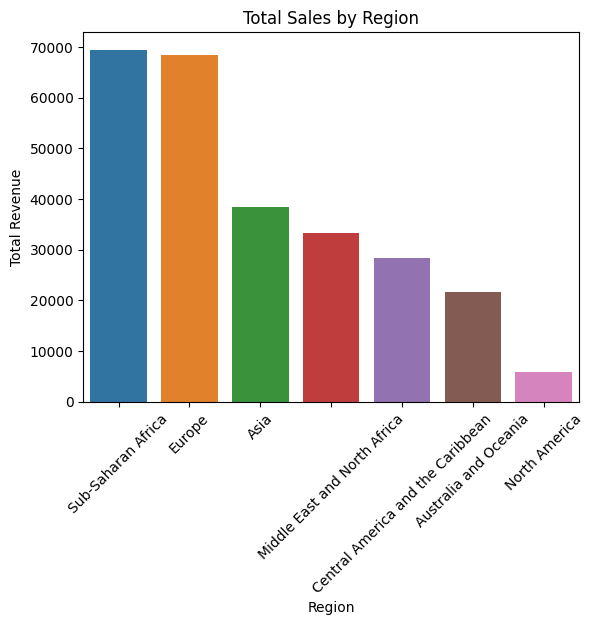

In [49]:
sales_by_region = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.xticks(rotation=45)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

### **Sales Channel Analysis**

Pie Chart to understand the distribution between **online** and **offline** sales.


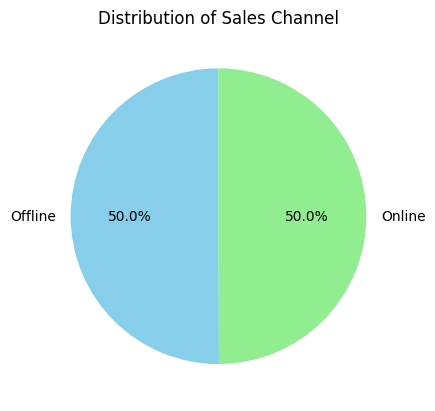

In [50]:
sales_channel_counts = df['Sales Channel'].value_counts()
sales_channel_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Sales Channel')
plt.ylabel('')
plt.show()

### **Top Product Categories**

Horizontal Bar Plot for **Top 5 product categories** by **total revenue**.



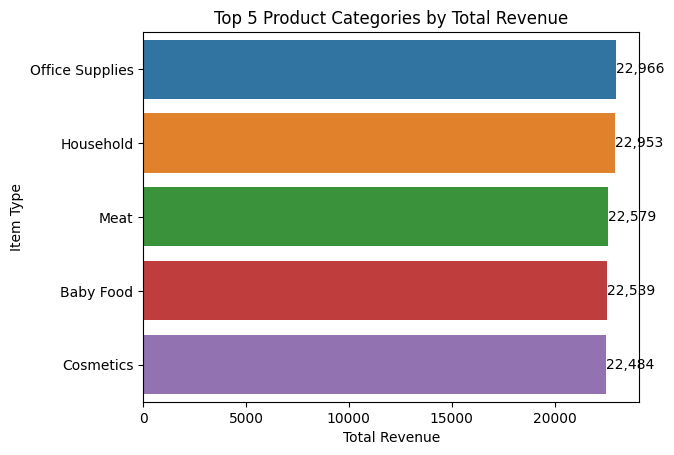

In [53]:
top_products = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(5)


sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 5 Product Categories by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')


for index, value in enumerate(top_products.values):
    plt.text(value, index, f'{int(value):,}', va='center')  # Formatting the number with commas

plt.show()

### **Seasonal Trends**

Line Plot to see the trend of **monthly sales**.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


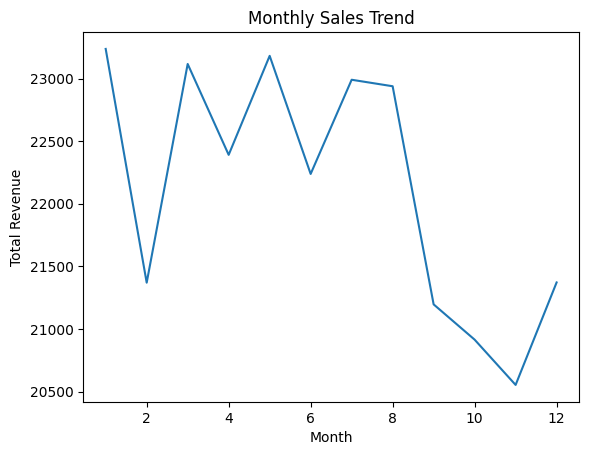

In [54]:
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

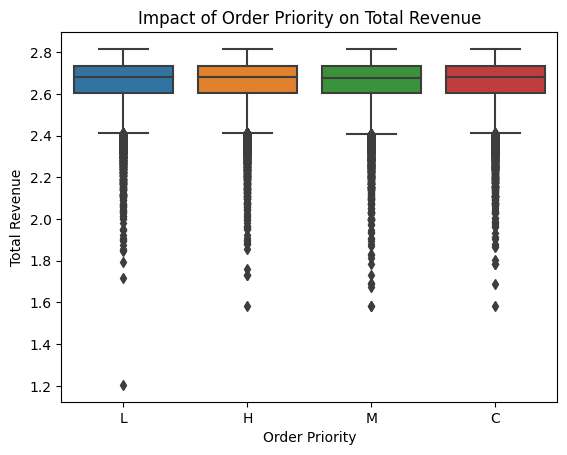

In [57]:
sns.boxplot(x='Order Priority', y='Total Revenue', data=df)
plt.title('Impact of Order Priority on Total Revenue')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()

In [61]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Revenue,Total Cost,Total Profit,Order Processing Time,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
4900000,Middle East and North Africa,Algeria,Clothes,Online,L,2019-09-06,446019446,2019-09-21,5921,109.28,...,2.665851,212208.64,12.982732,15,2019,9,6,2019,9,21
4900001,Europe,Bosnia and Herzegovina,Cosmetics,Online,H,2019-09-12,619706857,2019-10-13,3885,437.20,...,2.730807,1023037.05,13.423188,31,2019,9,12,2019,10,13
4900002,Asia,Maldives,Meat,Offline,M,2014-08-14,519134318,2014-08-17,2236,421.89,...,2.691730,815446.84,11.759006,3,2014,8,14,2014,8,17
4900003,Central America and the Caribbean,The Bahamas,Office Supplies,Online,H,2020-03-20,211538159,2020-05-05,7697,651.21,...,2.798952,4040617.12,13.786851,46,2020,3,20,2020,5,5
4900004,Middle East and North Africa,Somalia,Snacks,Online,H,2016-05-05,734467208,2016-05-14,4023,152.58,...,2.662179,392001.12,12.309663,9,2016,5,5,2016,5,14


In [62]:
df.to_csv('processed_sales_data.csv', index=False)
